In [ ]:
from PIL import Image
import requests
from transformers import AutoProcessor, AutoModel
import torch

model = AutoModel.from_pretrained("google/siglip-so400m-patch14-224")
processor = AutoProcessor.from_pretrained("google/siglip-so400m-patch14-224")

/home/anonymous/miniconda3/envs/moe_new/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


: 

In [2]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.distributed as dist

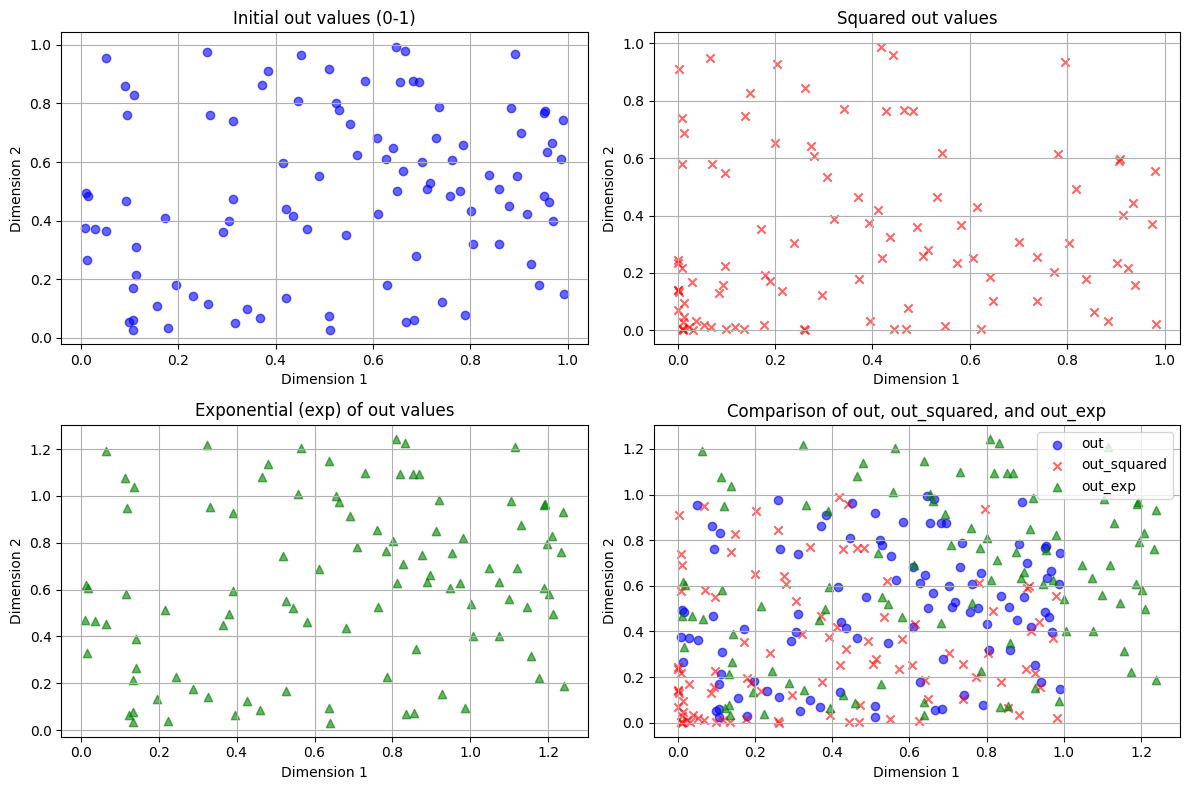

In [19]:
import torch
import matplotlib.pyplot as plt

# Tạo một vector 2 chiều ngẫu nhiên với 100 mẫu trong khoảng 0 - 1
num_samples = 100
out = torch.rand(num_samples, 2)  # 100 samples, mỗi sample có 2 giá trị trong khoảng [0, 1]

# Bình phương các giá trị trong vector
out_squared = out ** 2

# Tính hàm mũ (exp) của các giá trị trong vector
out_exp = out/0.8

# Vẽ đồ thị
plt.figure(figsize=(12, 8))

# Vẽ giá trị ban đầu (out)
plt.subplot(2, 2, 1)
plt.scatter(out[:, 0].numpy(), out[:, 1].numpy(), color='blue', alpha=0.6, marker='o')
plt.title('Initial out values (0-1)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)

# Vẽ giá trị bình phương (out_squared)
plt.subplot(2, 2, 2)
plt.scatter(out_squared[:, 0].numpy(), out_squared[:, 1].numpy(), color='red', alpha=0.6, marker='x')
plt.title('Squared out values')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)

# Vẽ giá trị sau khi tính hàm mũ (out_exp)
plt.subplot(2, 2, 3)
plt.scatter(out_exp[:, 0].numpy(), out_exp[:, 1].numpy(), color='green', alpha=0.6, marker='^')
plt.title('Exponential (exp) of out values')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)

# Vẽ so sánh giữa out, out_squared và out_exp trên cùng một đồ thị
plt.subplot(2, 2, 4)
plt.scatter(out[:, 0].numpy(), out[:, 1].numpy(), color='blue', alpha=0.6, marker='o', label='out')
plt.scatter(out_squared[:, 0].numpy(), out_squared[:, 1].numpy(), color='red', alpha=0.6, marker='x', label='out_squared')
plt.scatter(out_exp[:, 0].numpy(), out_exp[:, 1].numpy(), color='green', alpha=0.6, marker='^', label='out_exp')
plt.title('Comparison of out, out_squared, and out_exp')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True)

# Hiển thị đồ thị
plt.tight_layout()
plt.show()


In [2]:
import torch
import torch.nn as nn

# Tạo lớp Linear
in_features = 10
out_features = 3

# Tạo mô hình Linear với khởi tạo mặc định của PyTorch
fc = nn.Linear(in_features, out_features)

# Lấy trọng số và bias gốc do PyTorch khởi tạo
weight_pytorch = fc.weight.detach().clone()
bias_pytorch = fc.bias.detach().clone()

# Tính toán trọng số theo công thức mặc định của PyTorch:
# U(-1/sqrt(in_features), 1/sqrt(in_features))
import math

limit = 1 / math.sqrt(in_features)  # Tính giới hạn theo công thức
weight_manual = torch.empty(out_features, in_features).uniform_(-limit, limit)  # Phân phối Uniform
bias_manual = torch.zeros(out_features)  # Bias thường là 0

# In kết quả so sánh
print("=== Trọng số do PyTorch khởi tạo ===")
print(weight_pytorch)

print("\n=== Trọng số được tính thủ công ===")
print(weight_manual)

print("\n=== Bias do PyTorch khởi tạo ===")
print(bias_pytorch)

print("\n=== Bias được tính thủ công ===")
print(bias_manual)


=== Trọng số do PyTorch khởi tạo ===
tensor([[ 0.2158, -0.2054,  0.0345, -0.2129,  0.2448,  0.0115, -0.0437, -0.3091,
          0.0711, -0.1887],
        [ 0.1897, -0.2495,  0.0913,  0.1290,  0.2119,  0.2172,  0.1191,  0.2747,
          0.1896, -0.0239],
        [ 0.0401, -0.0876,  0.0820, -0.1712,  0.3065,  0.2540,  0.2201,  0.1143,
         -0.2112,  0.2276]])

=== Trọng số được tính thủ công ===
tensor([[-0.1068, -0.0234, -0.1000, -0.1588, -0.1745, -0.2640, -0.2087, -0.0578,
         -0.0486, -0.0659],
        [ 0.0131, -0.2920,  0.1329, -0.1167, -0.0764, -0.1428, -0.0701, -0.0750,
          0.3102, -0.1930],
        [ 0.2605,  0.0331, -0.0659, -0.0513, -0.0767, -0.0096,  0.0834,  0.1703,
          0.2897,  0.2339]])

=== Bias do PyTorch khởi tạo ===
tensor([-0.1894, -0.0049,  0.0933])

=== Bias được tính thủ công ===
tensor([0., 0., 0.])


In [6]:
# Sample input parameters
B = 2  # Batch size
N = 3  # Sequence length
K = 4  # Number of experts
D = 5  # Dimension of each expert output

# Create random expert outputs
torch.manual_seed(0)  # For reproducibility
expert_outputs = torch.randn(B, N, K, D)

print("Sample Expert Outputs:")
print(expert_outputs)
print("\nShape:", expert_outputs.shape)


Sample Expert Outputs:
tensor([[[[-1.1258e+00, -1.1524e+00, -2.5058e-01, -4.3388e-01,  8.4871e-01],
          [ 6.9201e-01, -3.1601e-01, -2.1152e+00,  3.2227e-01, -1.2633e+00],
          [ 3.4998e-01,  3.0813e-01,  1.1984e-01,  1.2377e+00,  1.1168e+00],
          [-2.4728e-01, -1.3527e+00, -1.6959e+00,  5.6665e-01,  7.9351e-01]],

         [[ 5.9884e-01, -1.5551e+00, -3.4136e-01,  1.8530e+00,  7.5019e-01],
          [-5.8550e-01, -1.7340e-01,  1.8348e-01,  1.3894e+00,  1.5863e+00],
          [ 9.4630e-01, -8.4368e-01, -6.1358e-01,  3.1593e-02, -4.9268e-01],
          [ 2.4841e-01,  4.3970e-01,  1.1241e-01,  6.4079e-01,  4.4116e-01]],

         [[-1.0231e-01,  7.9244e-01, -2.8967e-01,  5.2507e-02,  5.2286e-01],
          [ 2.3022e+00, -1.4689e+00, -1.5867e+00, -6.7309e-01,  8.7283e-01],
          [ 1.0554e+00,  1.7784e-01, -2.3034e-01, -3.9175e-01,  5.4329e-01],
          [-3.9516e-01, -4.4622e-01,  7.4402e-01,  1.5210e+00,  3.4105e+00]]],


        [[[-1.5312e+00, -1.2341e+00,  1.8197e

In [7]:
expert_outputs = expert_outputs.to(torch.float32)
B, N, K, D = expert_outputs.shape



In [8]:
# Reshape to [B*N, K, D] for easier computation
reshaped = expert_outputs.view(B * N, K, D)  # [B*N, K, D]

reshaped.shape

torch.Size([6, 4, 5])

In [9]:
# Compute pairwise squared Euclidean distances (MSE) between experts
# torch.cdist computes the Euclidean distance; square it and divide by D to get MSE
pairwise_sq_dist = torch.cdist(reshaped, reshaped, p=2) ** 2 / D  # [B*N, K, K]

In [10]:
pairwise_sq_dist

tensor([[[0.0000, 2.5027, 1.4628, 0.7810],
         [2.5027, 0.0000, 2.4010, 1.2846],
         [1.4628, 2.4010, 0.0000, 1.3933],
         [0.7810, 1.2846, 1.3933, 0.0000]],

        [[0.0000, 0.9003, 1.1126, 1.1746],
         [0.9003, 0.0000, 1.9194, 0.5896],
         [1.1126, 1.9194, 0.0000, 0.7809],
         [1.1746, 0.5896, 0.7809, 0.0000]],

        [[0.0000, 2.6453, 0.3838, 2.6367],
         [2.6453, 0.0000, 1.2588, 5.0015],
         [0.3838, 1.2588, 0.0000, 3.0644],
         [2.6367, 5.0015, 3.0644, 0.0000]],

        [[0.0000, 4.4968, 3.0975, 0.7296],
         [4.4968, 0.0000, 4.2420, 2.3361],
         [3.0975, 4.2420, 0.0000, 2.2638],
         [0.7296, 2.3361, 2.2638, 0.0000]],

        [[0.0000, 0.7688, 1.0708, 0.4118],
         [0.7688, 0.0000, 2.2007, 1.6159],
         [1.0708, 2.2007, 0.0000, 2.3242],
         [0.4118, 1.6159, 2.3242, 0.0000]],

        [[0.0000, 3.1313, 3.0828, 1.6303],
         [3.1313, 0.0000, 1.7738, 1.6602],
         [3.0828, 1.7738, 0.0000, 1.4253],
 

In [ ]:
# Create a mask to exclude the diagonal elements (distance of experts with themselves)
mask = torch.triu(torch.ones(K, K, device=expert_outputs.device), diagonal=1)  # [K, K]
mask = mask.unsqueeze(0).expand(B * N, K, K)  # [B*N, K, K]


In [ ]:

# Apply the mask to keep only unique pairs
pairwise_sq_dist = pairwise_sq_dist * mask  # [B*N, K, K]

# Calculate the number of unique pairs to normalize the loss
num_pairs = K * (K - 1) / 2

# Compute the mean MSE over all valid pairs
loss = pairwise_sq_dist.sum() / (B * N * num_pairs)

In [3]:
import torch
import torch.distributed as dist
step = 8316
warm_up = 0.05
rate_flip = 0.07
total_steps = step
step_warm = int(warm_up * step)
flip_steps = total_steps - step_warm
if flip_steps <= 0:
    raise ValueError("total_steps - step_warm must be > 0.")

# Giả định: flip_needed = 0.07 * flip_steps (v.d ~ 553)
flip_needed = int(round(flip_steps * rate_flip))

# 1) Chia flip_steps thành early/middle/late
early_ratio, middle_ratio = 0.3, 0.40
late_ratio = 1.0 - early_ratio - middle_ratio  # = 0.30
early_steps = int(round(flip_steps * early_ratio))
middle_steps = int(round(flip_steps * middle_ratio))
late_steps = flip_steps - early_steps - middle_steps

# 2) Chia flip_needed = e + m + l
#   (bạn tuỳ chỉnh tỉ lệ e_ratio, m_ratio, l_ratio)
e_ratio, m_ratio, l_ratio = 0.5, 0.0, 0.5
e = int(round(flip_needed * e_ratio))
m = int(round(flip_needed * m_ratio))
l = flip_needed - e - m
assert (e + m + l) == flip_needed, "Tổng e+m+l phải bằng flip_needed"


device = "cpu"
# Tạo 1 tensor bool cỡ flip_steps, toàn False ban đầu
prob_flips = torch.zeros(flip_steps, dtype=torch.bool, device=device)

# --- Early region ---
# Chọn ngẫu nhiên e step trong [0 .. early_steps-1]
if early_steps > 0 and e > 0:
    early_randperm = torch.randperm(early_steps, device=device)
    early_indices = early_randperm[:e]  # e phần tử đầu
    prob_flips[early_indices] = True

# --- Middle region ---
# Chọn m step trong [early_steps .. early_steps+middle_steps-1]
start_mid = early_steps
if middle_steps > 0 and m > 0:
    middle_randperm = torch.randperm(middle_steps, device=device)
    middle_indices = middle_randperm[:m] + start_mid
    prob_flips[middle_indices] = True

# --- Late region ---
# Chọn l step trong [start_late .. flip_steps-1]
start_late = early_steps + middle_steps
if late_steps > 0 and l > 0:
    late_randperm = torch.randperm(late_steps, device=device)
    late_indices = late_randperm[:l] + start_late
    prob_flips[late_indices] = True


# 5) Kiểm tra & lưu
count_true = prob_flips.sum().item()
ratio_true = count_true / flip_steps if flip_steps > 0 else 0
prob_flips = prob_flips
is_prob_flips = False

print(f"Total steps         = {total_steps}")
print(f"Warmup steps        = {step_warm}")
print(f"Flip steps          = {flip_steps}")
print(f"Flip needed (True)  = {flip_needed} (thực tế = {count_true})")
print(f"  => ratio comp. = {ratio_true:.4f}, ratio SMoE = {1-ratio_true:.4f}")
print(f"Early region  = {early_steps} steps, pick e = {e}")
print(f"Middle region = {middle_steps} steps, pick m = {m}")
print(f"Late region   = {late_steps} steps, pick l = {l}\n")


Total steps         = 8316
Warmup steps        = 415
Flip steps          = 7901
Flip needed (True)  = 553 (thực tế = 553)
  => ratio comp. = 0.0700, ratio SMoE = 0.9300
Early region  = 2370 steps, pick e = 276
Middle region = 3160 steps, pick m = 0
Late region   = 2371 steps, pick l = 277



In [17]:
prob_flips

tensor([False, False, False,  ..., False, False, False])

In [39]:

flip_steps = total_steps - step_warm
if flip_steps <= 0:
    raise ValueError("total_steps - step_warm must be > 0.")

# Tổng số lần competition mong muốn
flip_needed = int(round(flip_steps * rate_flip))  # ví dụ 0.07 => ~553



device = torch.device("cpu" if torch.cuda.is_available() else "cpu")

# Tạo tensor bool cỡ total_steps, toàn False
prob_flips = torch.zeros(total_steps, dtype=torch.bool, device=device)

# Ta chỉ sinh flip trong đoạn [step_warm .. total_steps-1].
# => Tạo 1 list các chỉ số (relative) cỡ flip_steps => [0..flip_steps-1],
#   map sang [step_warm.. step_warm + flip_steps - 1]

# 2) Ta chia flip_steps thành early/middle/late
early_ratio, middle_ratio = 0.30, 0.40
late_ratio = 1.0 - early_ratio - middle_ratio
early_steps = int(round(flip_steps * early_ratio))
middle_steps = int(round(flip_steps * middle_ratio))
late_steps = flip_steps - early_steps - middle_steps

# 3) Chia flip_needed = e + m + l
e_ratio, m_ratio, l_ratio = 0.4, 0.2, 0.4
e = int(round(flip_needed * e_ratio))
m = int(round(flip_needed * m_ratio))
l = flip_needed - e - m

# -- Early region: [0 .. early_steps-1] (relative indices)
if early_steps > 0 and e > 0:
    idx_early = torch.randperm(early_steps, device=device)[:e]
    # Dịch sang absolute index: + step_warm
    prob_flips[idx_early + step_warm] = True

# -- Middle region: [early_steps .. early_steps + middle_steps - 1]
start_middle = early_steps
if middle_steps > 0 and m > 0:
    idx_middle_rel = torch.randperm(middle_steps, device=device)[:m]
    idx_middle_abs = idx_middle_rel + (step_warm + start_middle)
    prob_flips[idx_middle_abs] = True

# -- Late region: [early_steps + middle_steps .. flip_steps - 1]
start_late = early_steps + middle_steps
if late_steps > 0 and l > 0:
    idx_late_rel = torch.randperm(late_steps, device=device)[:l]
    idx_late_abs = idx_late_rel + (step_warm + start_late)
    prob_flips[idx_late_abs] = True


# Kiểm tra
count_true = prob_flips.sum().item()
ratio_true = count_true / total_steps  # tỉ lệ so với tổng steps
ratio_true_flipregion = count_true / flip_steps if flip_steps > 0 else 0.0

prob_flips = prob_flips
is_prob_flips = False

print(f"total_steps          = {total_steps}")
print(f"step_warm            = {step_warm}")
print(f"flip_steps           = {flip_steps} (warm-up excluded)")
print(f"flip_needed          = {flip_needed}, thực tế = {count_true}")
print(f"ratio flip/all_steps = {ratio_true:.4f}")
print(f"ratio flip/flip_steps= {ratio_true_flipregion:.4f}")
print(f"early_steps = {early_steps}, middle_steps = {middle_steps}, late_steps = {late_steps}")
print(f"e={e}, m={m}, l={l}  --> e+m+l = {e+m+l}\n")

total_steps          = 8316
step_warm            = 415
flip_steps           = 7901 (warm-up excluded)
flip_needed          = 553, thực tế = 553
ratio flip/all_steps = 0.0665
ratio flip/flip_steps= 0.0700
early_steps = 2370, middle_steps = 3160, late_steps = 2371
e=221, m=111, l=221  --> e+m+l = 553



In [4]:
import matplotlib.pyplot as plt
import torch

def visualize_prob_flips(prob_flips, title="prob_flips Visualization", show_plot=True):
    """
    Trực quan hoá tensor prob_flips dạng [flip_steps] (bool).
    
    Args:
        prob_flips (torch.Tensor): 1D bool tensor, cỡ (flip_steps,).
        title (str): Tiêu đề plot.
        show_plot (bool): True thì hiển thị plot, False thì chỉ trả về figure, ax.
    
    Returns:
        fig, ax: figure và axes của matplotlib (để bạn tuỳ biến thêm).
    """
    # Chuyển prob_flips sang CPU (nếu đang ở GPU), cast sang int
    flips_int = prob_flips.cpu().int().numpy()  # 0=SMoE, 1=Competition
    x = range(len(flips_int))                   # toạ độ trục X

    fig, ax = plt.subplots(figsize=(20, 3))
    print(flips_int)
    # Cách 1: line plot cơ bản
    ax.plot(x, flips_int, label="Flip = 1", color="blue", linewidth=1)
    ax.set_ylim(-0.1, 1.1)  # Giới hạn trục Y từ -0.1 đến 1.1
    
    # Thêm một vài chi tiết
    ax.set_title(title)
    ax.set_xlabel("Step Index (sau warm-up)")
    ax.set_ylabel("Flip (0 or 1)")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

    if show_plot:
        plt.show()
    
    return fig, ax
# fig, ax = visualize_prob_flips(torch.tensor(state_dict_json["model.vision_tower.vision_model.encoder.layers.6.moelayer.prob_flips"]), title="Distribution of Competition Steps")


[0 0 0 ... 0 0 0]


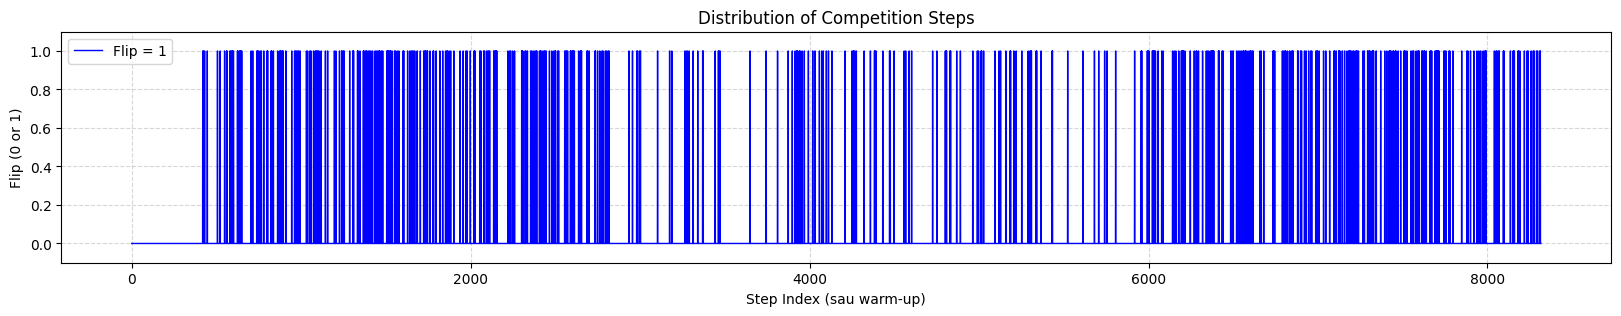

In [57]:
fig, ax = visualize_prob_flips(prob_flips, title="Distribution of Competition Steps")

In [1]:

from safetensors import safe_open
import json
import torch

# Đường dẫn tới tệp .safetensors
safetensors_path = "/cm/archive/anonymous/checkpoints/Xphi35-siglip224/demo/competesmoe/checkpoint-3000/model-00002-of-00003.safetensors"
json_output_path = "model_weights.json"

# Mở tệp .safetensors và đọc dữ liệu
state_dict = {}
with safe_open(safetensors_path, framework="pt", device="cuda:0") as f:
    for key in f.keys():
        state_dict[key] = f.get_tensor(key)

# Chuyển tensor thành danh sách (vì JSON không hỗ trợ tensor)
state_dict_json = {key: value.tolist() if torch.is_tensor(value) else value 
                   for key, value in state_dict.items()}
# from safetensors import safe_open
# import json
# import torch

# # Đường dẫn tới tệp .safetensors
# safetensors_path = "/cm/archive/anonymous/checkpoints/Xphi35-siglip224/sft/competesmoev32/model-00002-of-00003.safetensors"
# json_output_path = "model_weights.json"

# # Mở tệp .safetensors và đọc dữ liệu
# state_dict = {}
# with safe_open(safetensors_path, framework="pt", device="cuda:6") as f:
#     for key in f.keys():
#         state_dict[key] = f.get_tensor(key)

# # Chuyển tensor thành danh sách (vì JSON không hỗ trợ tensor)
# state_dict_json_real = {key: value.tolist() if torch.is_tensor(value) else value 
#                    for key, value in state_dict.items()}

In [2]:
if prob_flips[511] == 0:
    print(111)

NameError: name 'prob_flips' is not defined

In [3]:
loaded_dict = torch.load("/cm/shared/anonymous_H102/toolkitmoe/moe_model/model/moe/prob_flips_final.pt")

In [4]:
loaded_dict

{0: tensor([False, False, False,  ..., False, False, False], device='cuda:5'),
 1: tensor([False, False, False,  ..., False, False, False], device='cuda:5'),
 2: tensor([False, False, False,  ..., False, False, False], device='cuda:5'),
 3: tensor([False, False, False,  ..., False, False, False], device='cuda:5'),
 4: tensor([False, False, False,  ..., False, False, False], device='cuda:5'),
 5: tensor([False, False, False,  ..., False, False, False], device='cuda:5'),
 6: tensor([False, False,  True,  ..., False, False, False], device='cuda:5'),
 7: tensor([False, False, False,  ..., False, False, False], device='cuda:5'),
 8: tensor([False, False, False,  ...,  True, False, False], device='cuda:5'),
 9: tensor([False, False, False,  ..., False, False, False], device='cuda:5'),
 10: tensor([False, False,  True,  ..., False, False, False], device='cuda:5'),
 11: tensor([False, False,  True,  ..., False, False, False], device='cuda:5'),
 12: tensor([False, False, False,  ..., False, Fal

[0 0 0 ... 0 0 0]


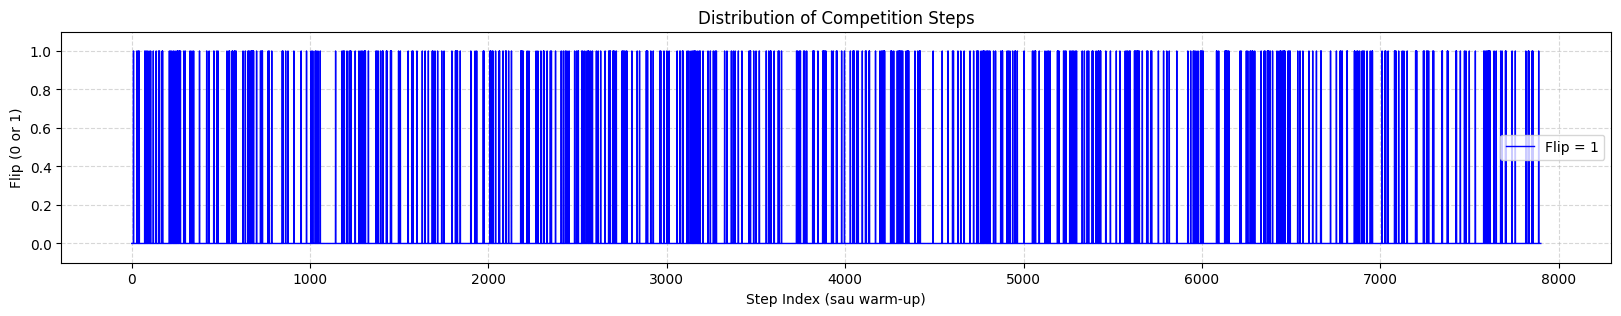

In [ ]:
fig, ax = visualize_prob_flips(torch.tensor(state_dict_json["model.vision_tower.vision_model.encoder.layers.12.moelayer.prob_flips"]), title="Distribution of Competition Steps")


[0 0 0 ... 0 0 0]


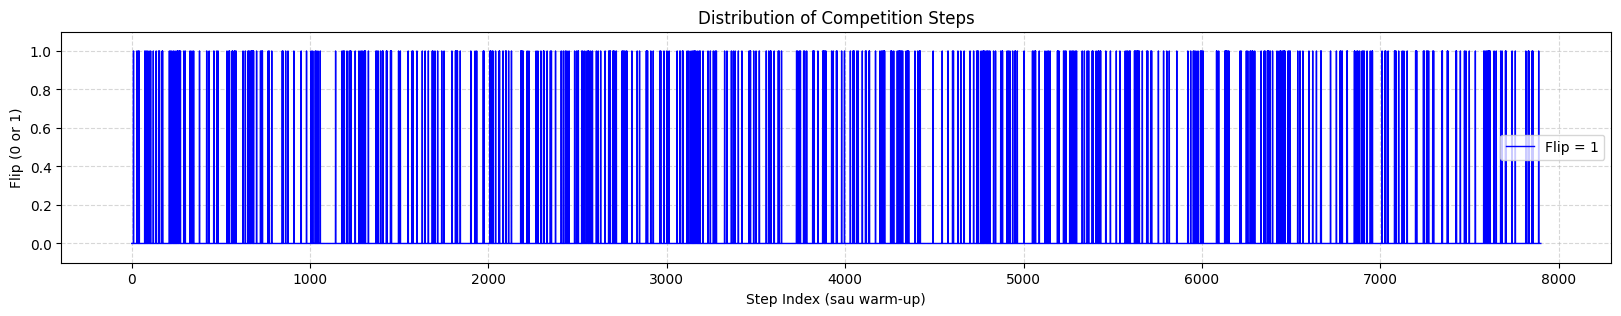

In [6]:
fig, ax = visualize_prob_flips(torch.tensor(state_dict_json_real["model.vision_tower.vision_model.encoder.layers.12.moelayer.prob_flips"]), title="Distribution of Competition Steps")


In [7]:
torch.tensor(state_dict_json_real["model.vision_tower.vision_model.encoder.layers.6.moelayer.prob_flips"]) != torch.tensor(state_dict_json["model.vision_tower.vision_model.encoder.layers.6.moelayer.prob_flips"])

tensor([False, False, False,  ..., False, False, False])

In [5]:
x = torch.tensor(loaded_dict[0], dtype=int)
for i in range(1, 28):
    x+=torch.tensor(loaded_dict[i],  dtype=int)
    # print((torch.tensor(state_dict_json_real[f"model.vision_tower.vision_model.encoder.layers.{i}.moelayer.prob_flips"]) != torch.tensor(state_dict_json[f"model.vision_tower.vision_model.encoder.layers.{i}.moelayer.prob_flips"])).sum()/8316)

/tmp/ipykernel_3483077/1969402019.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(loaded_dict[0], dtype=int)
/tmp/ipykernel_3483077/1969402019.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x+=torch.tensor(loaded_dict[i],  dtype=int)


In [7]:
x.max()

tensor(3, device='cuda:5')

In [ ]:
for i in range(x.shape[0]):
    print(x[i])

tensor(0, device='cuda:5')
tensor(3, device='cuda:5')
tensor(3, device='cuda:5')
tensor(1, device='cuda:5')
tensor(3, device='cuda:5')
tensor(3, device='cuda:5')
tensor(3, device='cuda:5')
tensor(3, device='cuda:5')
tensor(3, device='cuda:5')
tensor(3, device='cuda:5')
tensor(1, device='cuda:5')
tensor(0, device='cuda:5')
tensor(2, device='cuda:5')
tensor(0, device='cuda:5')
tensor(2, device='cuda:5')
tensor(3, device='cuda:5')
tensor(1, device='cuda:5')
tensor(1, device='cuda:5')
tensor(3, device='cuda:5')
tensor(2, device='cuda:5')
tensor(0, device='cuda:5')
tensor(3, device='cuda:5')
tensor(3, device='cuda:5')
tensor(2, device='cuda:5')
tensor(3, device='cuda:5')
tensor(0, device='cuda:5')
tensor(2, device='cuda:5')
tensor(0, device='cuda:5')
tensor(3, device='cuda:5')
tensor(3, device='cuda:5')
tensor(3, device='cuda:5')
tensor(0, device='cuda:5')
tensor(2, device='cuda:5')
tensor(1, device='cuda:5')
tensor(1, device='cuda:5')
tensor(2, device='cuda:5')
tensor(3, device='cuda:5')
t

: 

In [9]:
x+=torch.tensor(state_dict_json[f"model.mm_projector.moelayer.prob_flips"],  dtype=int)

In [10]:
x.max()

tensor(8)

In [25]:
log_list = [
    ("Layer 0", 0),
    ("Layer 1", 0),
    ("Layer 2", 0),
    ("Layer 3", 6),
    ("Layer 4", 26),
    ("Layer 5", 22),
    ("Layer 6", 54),
    ("Layer 7", 134),
    ("Layer 8", 206),
    ("Layer 9", 300),
    ("Layer 10", 444),
    ("Layer 11", 520),
    ("Layer 12", 636),
    ("Layer 13", 812),
    ("Layer 14", 968),
    ("Layer 15", 1146)
]


In [26]:
for l, v in log_list:
    print(v/100000)

0.0
0.0
0.0
6e-05
0.00026
0.00022
0.00054
0.00134
0.00206
0.003
0.00444
0.0052
0.00636
0.00812
0.00968
0.01146


In [24]:
with open("/cm/shared/anonymous_H102/toolkitmoe/moe_pretrain_model/full_prob_competesmoe.json", 'r') as f:
    data_full = json.load(f)
with open("/cm/shared/anonymous_H102/toolkitmoe/moe_pretrain_model/3prob_competesmoe.json", 'r') as f:
    data_3 = json.load(f)

In [19]:
for i in range(16):
    print((torch.tensor(data_full[str(i)]) != torch.tensor(data_3[str(i)])).sum())

tensor(12575)
tensor(12386)
tensor(12260)
tensor(12418)
tensor(12554)
tensor(12380)
tensor(12177)
tensor(12335)
tensor(12241)
tensor(12556)
tensor(12406)
tensor(12353)
tensor(12279)
tensor(12312)
tensor(12486)
tensor(12526)


In [20]:
import numpy as np

# Trích xuất dữ liệu từ cả hai dictionary
key = "model.vision_tower.vision_model.encoder.layers.6.moelayer.prob_flips"

values_real = state_dict_json_real.get(key, None)
values = state_dict_json.get(key, None)

# Kiểm tra nếu cả hai đều có dữ liệu
if values_real is not None and values is not None:
    # Chuyển thành NumPy array nếu chưa phải    
    values_real = np.array(values_real)
    values = np.array(values)
    
    # Lấy phần tử khác nhau
    different_elements = np.setdiff1d(values_real, values)

    print("Các phần tử khác nhau:", different_elements)
else:
    print("Key không tồn tại trong một trong hai dictionary.")


Các phần tử khác nhau: []


In [11]:
state_dict_json_real["model.vision_tower.vision_model.encoder.layers.6.moelayer.prob_flips"]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 F

In [ ]:
state_dict_json_real['model.vision_tower.vision_model.encoder.layers.0.moelayer.experts.1.fc1.weight']

KeyboardInterrupt: 

: 

In [7]:
state_dict_json["model.vision_tower.vision_model.encoder.layers.6.moelayer.prob_flips"]

[False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False